## Dataset preparation
File type: CSV, source: https://www.kaggle.com/datasets/saddamazyazy/go-to-college-dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('https://github.com/JollyFrankle/MLDLFinalProject/raw/main/dataset.csv')
df = pd.DataFrame(data)
df.head(10)

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,in_college
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False,True
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False,True
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False,True
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True,True
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False,False
5,Vocational,B,Female,Less Interested,Rural,48,3770000,65.3,86.79,True,False
6,Academic,A,Male,Very Interested,Rural,52,6680000,85.5,90.39,True,True
7,Academic,B,Male,Very Interested,Rural,53,5890000,83.3,84.65,True,False
8,Academic,B,Female,Uncertain,Rural,52,6730000,80.3,88.50,True,True
9,Academic,B,Female,Very Interested,Rural,47,3880000,68.0,85.43,True,False


In [2]:
# transformasi data kategorikal
df['type_school']=df['type_school'].map({'Academic': 1,'Vocational': 2})
df['school_accreditation']=df['school_accreditation'].map({'A': 1, 'B': 2, 'C': 3})
df['gender']=df['gender'].map({'Male': 1,'Female': 2})
df['interest']=df['interest'].map({'Not Interested': 1, 'Less Interested': 2, 'Uncertain': 3, 'Quiet Interested': 4, 'Very Interested': 5})
df['residence']=df['residence'].map({'Urban': 1,'Rural': 2})

X = df.iloc[:,:-1] # data yang ingin diteliti: Semua kolom, kecuali "in_college"
y = df.iloc[:,-1] # hasil riil: "in_college"

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.7, random_state=0)

df.head(10)

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,in_college
0,1,1,1,2,1,56,6950000,83.0,84.09,False,True
1,1,1,1,2,1,57,4410000,76.8,86.91,False,True
2,1,2,2,5,1,50,6500000,80.6,87.43,False,True
3,2,2,1,5,2,49,6600000,78.2,82.12,True,True
4,1,1,2,5,1,57,5250000,75.1,86.79,False,False
5,2,2,2,2,2,48,3770000,65.3,86.79,True,False
6,1,1,1,5,2,52,6680000,85.5,90.39,True,True
7,1,2,1,5,2,53,5890000,83.3,84.65,True,False
8,1,2,2,3,2,52,6730000,80.3,88.50,True,True
9,1,2,2,5,2,47,3880000,68.0,85.43,True,False


## Percobaan Pertama
Mencari value terbaik dari beberapa jenis scaler dan beberapa jenis classifier:

For each of the classifier (RandomForest and SVC) and each of the scaler (StandardScaler, MinMaxScaler, RobustScaler, and Normalizer):

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import cross_val_score

for classifier in [RandomForestClassifier(n_estimators=100, random_state=0), SVC(C=10, gamma=0.1)]:
    for scaler in [None, StandardScaler(), MinMaxScaler(), RobustScaler()]:
        pipe = Pipeline([
            ("scaler", scaler),
            ("classifier", classifier)
        ])

        pipe.fit(X_train, y_train)

        best_clf = pipe
        print(">>> Classifier: {}".format(best_clf.named_steps["classifier"]))

        print("{}:".format(type(scaler).__name__))

        score10 = cross_val_score(best_clf, X_train, y_train, cv=10)
        print("10-fold cross validation score: {:.2f}%".format(score10.mean()*100));
        
        pred = best_clf.predict(X_test)
        confusion = confusion_matrix(y_test, pred)
        print("Confusion matrix:\n{}\n".format(confusion))
        print("Classification report:\n{}".format(classification_report(y_test, pred, digits=3)))
        clfrep = classification_report(y_test, pred, digits=3)

        auc_score = 0
        if type(classifier).__name__ == "RandomForestClassifier": # atau untuk multi-class
            auc_score = roc_auc_score(y_test, best_clf.predict_proba(X_test)[:,1])
        elif type(classifier).__name__ == "SVC": # atau untuk single-class
            auc_score = roc_auc_score(y_test, best_clf.decision_function(X_test))
        print("AUC score: {:.3f}\n\n".format(auc_score))

>>> Classifier: RandomForestClassifier(random_state=0)
NoneType:
10-fold cross validation score: 89.33%
Confusion matrix:
[[301  44]
 [ 45 310]]

Classification report:
              precision    recall  f1-score   support

       False      0.870     0.872     0.871       345
        True      0.876     0.873     0.874       355

    accuracy                          0.873       700
   macro avg      0.873     0.873     0.873       700
weighted avg      0.873     0.873     0.873       700

AUC score: 0.941


>>> Classifier: RandomForestClassifier(random_state=0)
StandardScaler:
10-fold cross validation score: 89.67%
Confusion matrix:
[[302  43]
 [ 45 310]]

Classification report:
              precision    recall  f1-score   support

       False      0.870     0.875     0.873       345
        True      0.878     0.873     0.876       355

    accuracy                          0.874       700
   macro avg      0.874     0.874     0.874       700
weighted avg      0.874     0.874     

## Percobaan Kedua
### 0. Correlation Matrix

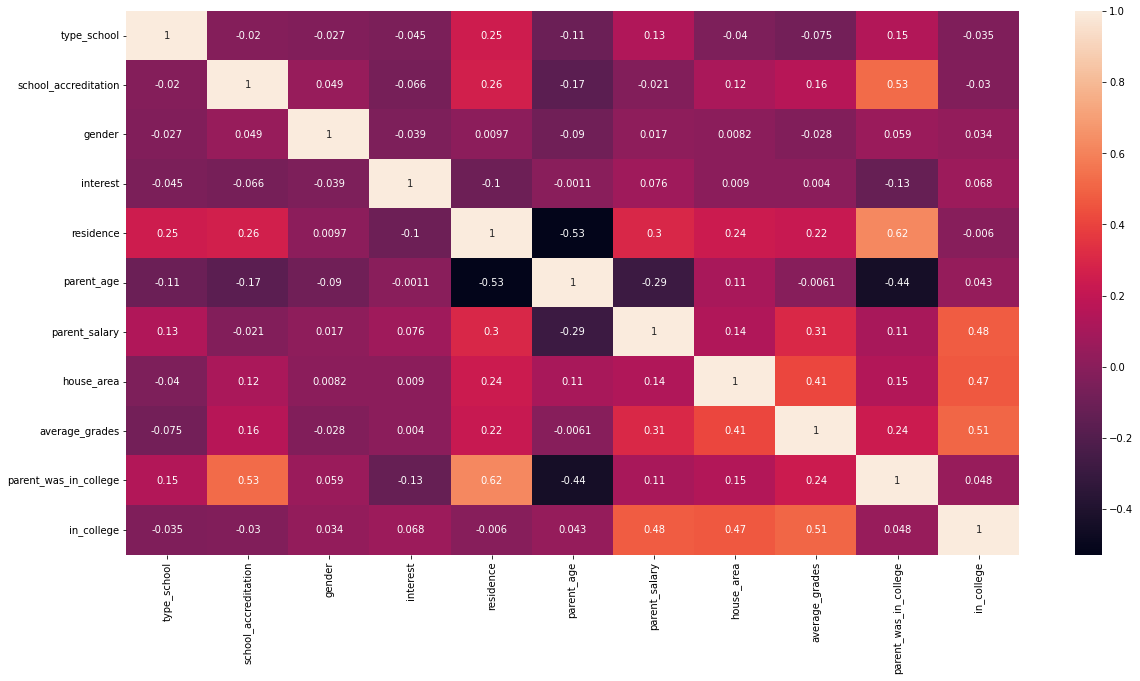

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# correlation matrix
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

# tidak digunakan dalam paper.

### 1. Feature importances

In [5]:
# plotting feature importances:
def plot_feat_imp(model, columns):
    # print("Column count: {:d} - Feature importances count: {:d}".format(columns.size, model.feature_importances_.size))
    n_features = columns.size
    plt.barh(range(n_features), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features), columns)
    plt.ylabel("Feature importance")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)

Best estimator: Pipeline(steps=[('scaler', None),
                ('classifier',
                 DecisionTreeClassifier(max_depth=8, random_state=0))])
Feature importances in amount:
[0.03341218 0.         0.01797753 0.01328619 0.08375033 0.00318858
 0.25917858 0.1678608  0.41010985 0.01123596]


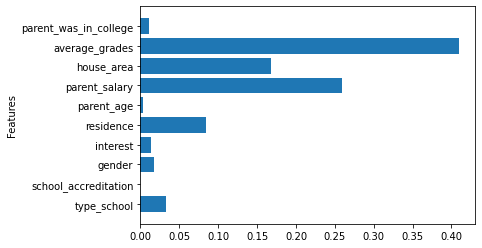

In [6]:
# adapted from https://www.kaggle.com/code/maximilianschutte/decision-tree-going-to-college-ms

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

param_grid = {"classifier__max_depth": range(1, 20)}
pipe = Pipeline([
    ("scaler", None),
    ("classifier", DecisionTreeClassifier(random_state=0))
])

# pencarian pohon terbaik menggunakan Grid Search CV
grid_search = GridSearchCV(pipe, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best estimator: {}".format(grid_search.best_estimator_))
plot_feat_imp(grid_search.best_estimator_.named_steps["classifier"], X.columns)
print("Feature importances in amount:\n{}".format(grid_search.best_estimator_.named_steps["classifier"].feature_importances_))

### 2, 3. SelectKBest pada SVM dan Random Forest

In [7]:
# import SelectKBest
from sklearn.feature_selection import SelectKBest

# parameter terbaik berdasarkan percobaan pertama: SVM C=10, gamma=0.1 with RobustScaler
from sklearn.preprocessing import RobustScaler

# objek scaler, fit thd X_train:
rb_sc = RobustScaler()
rb_sc.fit(X_train)

# penskalaan menggunakan transform
X_train_rbsc = rb_sc.transform(X_train)
X_test_rbsc = rb_sc.transform(X_test)

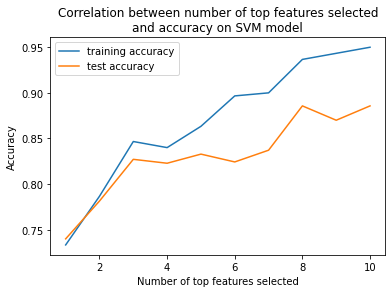

In [8]:
from sklearn.svm import SVC
training_accuracy = []
test_accuracy = []

value_K = range(1, 11, 1)

for k in value_K:
    # build the model
    SKBest = SelectKBest(k=k)
    SKBest.fit(X_train_rbsc, y_train)
    X_train_sel = SKBest.transform(X_train_rbsc)
    X_test_sel = SKBest.transform(X_test_rbsc)

    clf = SVC(C=10, gamma=0.1)
    clf.fit(X_train_sel, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train_sel, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test_sel, y_test))
    
plt.plot(value_K, training_accuracy, label="training accuracy")
plt.plot(value_K, test_accuracy, label="test accuracy")
plt.title("Correlation between number of top features selected\nand accuracy on SVM model")
plt.ylabel("Accuracy")
plt.xlabel("Number of top features selected")
plt.legend()

In [9]:
# parameter terbaik berdasarkan percobaan pertama: RFC n_estimators=100 with StandardScaler
from sklearn.preprocessing import StandardScaler

# objek scaler, fit thd X_train:
st_sc = StandardScaler()
st_sc.fit(X_train)

# penskalaan menggunakan transform
X_train_stsc = st_sc.transform(X_train)
X_test_stsc = st_sc.transform(X_test)

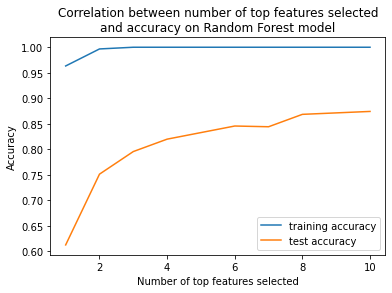

In [10]:
from sklearn.ensemble import RandomForestClassifier
training_accuracy = []
test_accuracy = []

value_K = range(1, 11, 1)

for k in value_K:
    # build the model
    SKBest = SelectKBest(k=k)
    SKBest.fit(X_train_stsc, y_train)
    X_train_sel = SKBest.transform(X_train_stsc)
    X_test_sel = SKBest.transform(X_test_stsc)

    clf = RandomForestClassifier(n_estimators=100, random_state=0)
    clf.fit(X_train_sel, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train_sel, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test_sel, y_test))
    
plt.plot(value_K, training_accuracy, label="training accuracy")
plt.plot(value_K, test_accuracy, label="test accuracy")
plt.title("Correlation between number of top features selected\nand accuracy on Random Forest model")
plt.ylabel("Accuracy")
plt.xlabel("Number of top features selected")
plt.legend()

### 4, 5. ROC Curve
Using decision function for SVC and predict proba for RandomForestClassifier.

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

param_grid = {
    'classifier__C' : [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__gamma' : [0.001, 0.01, 0.1, 1, 10, 100]
}
pipe = Pipeline([
    ("scaler", MinMaxScaler()),
    ("classifier", SVC())
])

grid_search = GridSearchCV(pipe, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters : {}".format(grid_search.best_params_))
print("Best cross-validation score : {:.2f}".format(grid_search.best_score_))
print("Test set score : {:.2}".format(grid_search.score(X_test, y_test)))

Best parameters : {'classifier__C': 10, 'classifier__gamma': 0.1}
Best cross-validation score : 0.86
Test set score : 0.86


AUC for SVC: 0.934


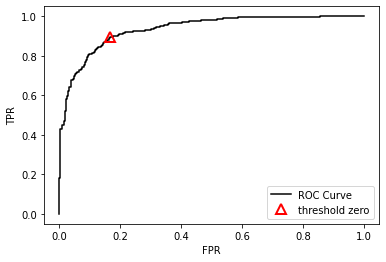

In [12]:
from sklearn.metrics import roc_curve
import numpy as np

fpr, tpr, thresholds = roc_curve(y_test, grid_search.best_estimator_.decision_function(X_test))

plt.plot(fpr, tpr, label = "ROC Curve", color= 'k')
plt.xlabel("FPR")
plt.ylabel("TPR")

close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], '^', markersize=10, label="threshold zero",
         fillstyle="none", c = 'r', mew=2)
plt.legend(loc=4);

from sklearn.metrics import roc_auc_score

svc_auc = roc_auc_score(y_test, grid_search.best_estimator_.decision_function(X_test))
print("AUC for SVC: {:.3f}".format(svc_auc))

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

param_grid2 = {
    'classifier__max_depth': [3, 4, 5],
    "classifier__random_state": [0]
}

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", RandomForestClassifier())
])

grid_search2 = GridSearchCV(pipe, param_grid2, cv=5)

grid_search2.fit(X_train, y_train)

print("Best parameters : {}".format(grid_search2.best_params_))
print("Best cross-validation score : {:.2f}".format(grid_search2.best_score_))
print("Test set score : {:.2}".format(grid_search2.score(X_test, y_test)))

Best parameters : {'classifier__max_depth': 5, 'classifier__random_state': 0}
Best cross-validation score : 0.87
Test set score : 0.87


AUC for RandomForestClassifier: 0.933


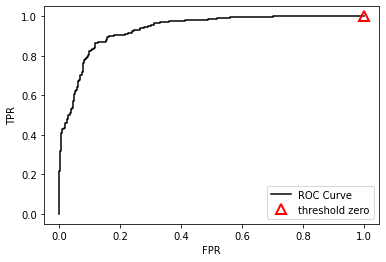

In [14]:
from sklearn.metrics import roc_curve
import numpy as np

# print("{}".format(grid_search2.best_estimator_.predict_proba(X_test_stsc)))
fpr, tpr, thresholds = roc_curve(y_test, grid_search2.best_estimator_.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, label = "ROC Curve", color= 'k')
plt.xlabel("FPR")
plt.ylabel("TPR")

close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], '^', markersize=10, label="threshold zero",
         fillstyle="none", c = 'r', mew=2)
plt.legend(loc=4);

from sklearn.metrics import roc_auc_score

svc_auc = roc_auc_score(y_test, grid_search2.best_estimator_.predict_proba(X_test)[:,1])
print("AUC for RandomForestClassifier: {:.3f}".format(svc_auc))